In [1]:
import os.path
import re
import sys
import numpy as np
import json
import time
import pandas as pd
import h5py
from tqdm import tnrange, tqdm_notebook
import urllib
import glob

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
df = pd.read_hdf('/data/captioning/bm_data.h5', 'df')
df

,print.value,url.value,captions,materials,dates,id
0,http://collection.britishmuseum.org/id/object/...,http://www.britishmuseum.org/collectionimages/...,"From the animal legend; antelope to left, anot...",Woodcut,1912,0
1,http://collection.britishmuseum.org/id/object/...,http://www.britishmuseum.org/collectionimages/...,Woodblock print. Giant lantern in the Kaminari...,n/a,n/a,1
2,http://collection.britishmuseum.org/id/object/...,http://www.britishmuseum.org/collectionimages/...,Woodblock print. Spring night at Ginza.,n/a,n/a,2
3,http://collection.britishmuseum.org/id/object/...,http://www.britishmuseum.org/collectionimages/...,Le Mont de Neuville; street winding to right b...,"Charcoal (?), with watercolour, over monotype",1899,3
4,http://collection.britishmuseum.org/id/object/...,http://www.britishmuseum.org/collectionimages/...,Monochrome woodblock print. Subodai standing. ...,n/a,n/a,4
5,http://collection.britishmuseum.org/id/object/...,http://www.britishmuseum.org/collectionimages/...,Colour woodblock print with powdered mica back...,n/a,n/a,5
6,http://collection.britishmuseum.org/id/object/...,http://www.britishmuseum.org/collectionimages/...,Woodblock print. Beauty with unrolled obi?,n/a,n/a,6
7,http://collection.britishmuseum.org/id/object/...,http://www.britishmuseum.org/collectionimages/...,Colour woodblock print with gold leaf and powd...,n/a,n/a,7
8,http://collection.britishmuseum.org/id/object/...,http://www.britishmuseum.org/collectionimages/...,"Illustrated book, orihon , 5 vols . Instructio...",n/a,n/a,8
9,http://collection.britishmuseum.org/id/object/...,http://www.britishmuseum.org/collectionimages/...,"Illustrated book, folding album, 2 vols. Varie...",n/a,n/a,9


In [13]:
sum(df['captions'].map(lambda x: x.strip() == ''))

2992

In [10]:
print len(df)
df_no_empty = df[df['captions'] != '']
print len(df_no_empty)


254241
251249


In [33]:
106233 in df_no_empty['captions']

True

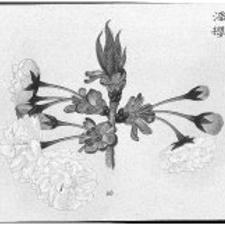

In [3]:
from IPython.display import Image
from IPython.display import display

Image(filename="/data/captioning/img_100_gs/9.jpg_postproc.jpg")

In [5]:
DATA_PATH = '/data/captioning/img_100_gs/'
OUT_PATH = '/data/captioning/json_img_100_gs.json'

os.chdir(DATA_PATH)

res = []  

##[{ "file_path": "path/img.jpg", "captions": ["a caption", "a similar caption" ...] }, ...]
count = 0

for file in glob.glob('*.jpg'):
    ind = str(file).replace('.jpg_postproc.jpg', '')
    x= Image(filename=file)
    #display(x)
    #print df['captions'][int(ind)]
    entry = {"file_path":str(file), "captions":[df['captions'][int(ind)]]}
    res.append(entry)
    count+=1
    if (count % 1000 == 0):
        print count
    
import json
with open(OUT_PATH, 'w') as outfile:
    json.dump(res, outfile)

In [6]:
res[-20:]

[{'captions': [u'St Thomas, standing in a landscape, holding a spear and a book; after D\xfcrer.'],
  'file_path': '99913.jpg_postproc.jpg'},
 {'captions': [u'Portrait, bust in an oval frame directed to right, looking ahead of him, wearing a fur-trimmed robe over a waistcoat and frilled cravat, with powdered hair to his ears'],
  'file_path': '99960.jpg_postproc.jpg'},
 {'captions': [u'The quay and landing stage of a small harbour; with two male figures at a shallop in right foreground and a small sail boat at centre.'],
  'file_path': '99930.jpg_postproc.jpg'},
 {'captions': [u"A woman presenting a criminal, crouching below her and held by a rope tied around his wrist, to an finely dressed woman seated at left, dressing table behind and gardens through window in background; after Alfred Edward Chalon, proof illustration for 'The Literary Souvenir'"],
  'file_path': '99970.jpg_postproc.jpg'},
 {'captions': [u'Portrait, half-length seated almost in profile to right, head turned to look 

In [31]:
import string
for a in res:
    print str(a['captions']).lower().translate(None, string.punctuation).strip().split()

['uan', 'angel', 'at', 'lower', 'right', 'a', 'naked', 'child', 'tied', 'to', 'a', 'tree', 'at', 'left', 'after', 'guido', 'reni']
['uportrait', 'halflength', 'in', 'profile', 'to', 'right', 'looking', 'towards', 'the', 'viewer', 'over', 'right', 'shoulder', 'wearing', 'armour', 'and', 'long', 'brown', 'wig', 'after', 'kneller']
['uillustrated', 'book', 'folding', 'album', '2', 'vols', 'varieties', 'of', 'cherry', 'blossom', 'woodblockprinted']
['utitle', 'page', 'to', 'the', 'literary', 'souvenir', 'and', 'cabinet', 'of', 'modern', 'art', 'with', 'vignette', 'of', 'a', 'woman', 'sitting', 'on', 'a', 'bench', 'in', 'a', 'garden', 'with', 'her', 'arms', 'around', 'two', 'children', 'standing', 'either', 'side', 'of', 'her', 'after', 'alfred', 'edward', 'chalon', 'proof', 'c']
['uaphrodite', 'interfering', 'in', 'the', 'fight', 'between', 'paris', 'and', 'menelaus', 'illustration', 'to', 'liliade', 'dhomxe8re', 'traduite', 'en', 'franxe7ois', 'a', 'french', 'translation', 'of', 'the', 'i